<a href="https://colab.research.google.com/github/manic2man/Lambda-DSpt5-Unit-Projects/blob/master/Exercise_vs_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# At one point the website went down, but I had downloaded the dataset already
# I just wanted to use the url because it meant someone else could run this.
#df = pd.read_csv('/content/BCHI-dataset_2019-03-04.csv')
url = 'https://bchi.bigcitieshealth.org/rails/active_storage/blobs/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBPUT09IiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--d420076690399fd28de697fa5a876e8b1d3188ac/BCHI-dataset_2019-03-04.csv?disposition=attachment'
df = pd.read_csv(url)
df.head()

,Indicator Category,Indicator,Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
0,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,1.7,"Washington, DC",Age-Adjusted rate of opioid-related mortality ...,"D.C. Department of Health, Center for Policy, ...",NaN,This indicator is not exclusive of other drugs...,NaN,NaN,NaN,NaN
1,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.2,"Fort Worth (Tarrant County), TX",Age-adjusted rate of opioid-related mortality ...,National Center for Health Statistics,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,1.5,3.0
2,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.3,"Oakland (Alameda County), CA",Age-adjusted rate of opioid-related mortality ...,CDC Wonder,Age-adjusted rate of opioid-related mortality ...,Data is for Alameda County. This indicator is ...,NaN,NaN,1.6,3.2
3,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,3.0,"San Antonio, TX",Age-adjusted rate of opioid-related mortality ...,CDC Wonder,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,2.2,3.9
4,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,4.4,"U.S. Total, U.S. Total",Age-Adjusted rate of opioid-related mortality ...,CDC WONDER,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,4.4,4.5


In [2]:
# I may change my mind later, but I want observations I can compare against each other,
# while camparing across different sexes and races may twist results
df1 = df[(df['Sex'] == 'Both') & (df['Race/Ethnicity'] == 'All')]
df1

,Indicator Category,Indicator,Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
0,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,1.7,"Washington, DC",Age-Adjusted rate of opioid-related mortality ...,"D.C. Department of Health, Center for Policy, ...",NaN,This indicator is not exclusive of other drugs...,NaN,NaN,NaN,NaN
1,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.2,"Fort Worth (Tarrant County), TX",Age-adjusted rate of opioid-related mortality ...,National Center for Health Statistics,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,1.5,3.0
2,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.3,"Oakland (Alameda County), CA",Age-adjusted rate of opioid-related mortality ...,CDC Wonder,Age-adjusted rate of opioid-related mortality ...,Data is for Alameda County. This indicator is ...,NaN,NaN,1.6,3.2
3,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,3.0,"San Antonio, TX",Age-adjusted rate of opioid-related mortality ...,CDC Wonder,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,2.2,3.9
4,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,4.4,"U.S. Total, U.S. Total",Age-Adjusted rate of opioid-related mortality ...,CDC WONDER,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,4.4,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34313,Social and Economic Factors,Percent Unemployed,2014,Both,All,10.9,"Chicago, Il",Percent of unemployment among population 16 an...,"US Census Bureau, American Community Survey 1-...",NaN,Place=Chicago was used to isolate American Com...,10.5,11.3,NaN,NaN
34314,Social and Economic Factors,Percent Unemployed,2014,Both,All,11.8,"Baltimore, MD",Percent of unemployment among population 16 an...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 2404000 was used to isolate data for...,10.9,12.7,NaN,NaN
34315,Social and Economic Factors,Percent Unemployed,2014,Both,All,12.8,"Philadelphia, PA",Percent of unemployment among population 16 an...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 4260000 was used to isolate data for...,12.0,13.6,NaN,NaN
34316,Social and Economic Factors,Percent Unemployed,2014,Both,All,18.4,"Cleveland, OH",Percent of unemployment among population 16 an...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 3916000 was used to isolate data for...,17.1,19.7,NaN,NaN


In [3]:
#Don't need the methodologies for visualization
df_slim = df1[['Place', 'Year', 'Indicator', 'Value']]
df_slim

,Place,Year,Indicator,Value
0,"Washington, DC",2010,Opioid-Related Unintentional Drug Overdose Mor...,1.7
1,"Fort Worth (Tarrant County), TX",2010,Opioid-Related Unintentional Drug Overdose Mor...,2.2
2,"Oakland (Alameda County), CA",2010,Opioid-Related Unintentional Drug Overdose Mor...,2.3
3,"San Antonio, TX",2010,Opioid-Related Unintentional Drug Overdose Mor...,3.0
4,"U.S. Total, U.S. Total",2010,Opioid-Related Unintentional Drug Overdose Mor...,4.4
...,...,...,...,...
34313,"Chicago, Il",2014,Percent Unemployed,10.9
34314,"Baltimore, MD",2014,Percent Unemployed,11.8
34315,"Philadelphia, PA",2014,Percent Unemployed,12.8
34316,"Cleveland, OH",2014,Percent Unemployed,18.4


In [4]:
# Just picking out my variables
# Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)
# Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)
# All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)
# Suicide Rate (Age-Adjusted; Per 100,000 people)
# Percent of Population Uninsured
# Percent of Adults Who Meet CDC-Recommended Physical Activity Levels
df_slim.Indicator.value_counts()

Percent of Households Whose Housing Costs Exceed 35% of Income                                         165
Percent Who Only Speak English at Home                                                                 145
Total Population (People)                                                                              145
Persons Living with HIV/AIDS Rate (Per 100,000 people)                                                 145
Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)                                        143
Percent of Population Under 18                                                                         143
Percent Who Speak Spanish at Home                                                                      142
Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)                                             142
Percent of Population with a Disability                                                                142
Percent of 3 and 4 Year Olds Currentl

In [5]:
df_small = df_slim[df_slim['Indicator'].isin(['Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)',
                                              'Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)',
                                              'All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)',
                                              'Suicide Rate (Age-Adjusted; Per 100,000 people)',
                                              'Percent of Population Uninsured',
                                              'Percent of Adults Who Meet CDC-Recommended Physical Activity Levels'])]
df_small['Indicator'].value_counts()

Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)          143
Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)               142
All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)    140
Percent of Population Uninsured                                          131
Suicide Rate (Age-Adjusted; Per 100,000 people)                          126
Percent of Adults Who Meet CDC-Recommended Physical Activity Levels       60
Name: Indicator, dtype: int64

In [6]:
df_small.head()

,Place,Year,Indicator,Value
1465,"Los Angeles, CA",2010,All Types of Cancer Mortality Rate (Age-Adjust...,88.5
1466,"Phoenix, AZ",2010,All Types of Cancer Mortality Rate (Age-Adjust...,98.0
1467,"Miami (Miami-Dade County), FL",2010,All Types of Cancer Mortality Rate (Age-Adjust...,140.1
1468,"San Francisco, CA",2010,All Types of Cancer Mortality Rate (Age-Adjust...,149.9
1469,"Seattle, WA",2010,All Types of Cancer Mortality Rate (Age-Adjust...,156.7


In [7]:
df_small.shape

(742, 4)

In [8]:
# Setting that option was useful for seeing full datasets, but it just makes the
#notebook cumbersome to read at this point
#pd.options.display.max_rows = 999
df_wide = df_small.pivot_table(index=['Place', 'Year'], columns='Indicator', values='Value').reset_index()
df_wide

Indicator,Place,Year,"All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)","Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)","Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)",Percent of Adults Who Meet CDC-Recommended Physical Activity Levels,Percent of Population Uninsured,"Suicide Rate (Age-Adjusted; Per 100,000 people)"
0,"Austin, TX",2015,NaN,NaN,NaN,NaN,14.4,NaN
1,"Austin, TX",2016,NaN,NaN,NaN,NaN,13.1,NaN
2,"Baltimore, MD",2010,NaN,NaN,NaN,68.4,NaN,NaN
3,"Baltimore, MD",2011,NaN,NaN,NaN,68.4,NaN,NaN
4,"Baltimore, MD",2012,213.9,NaN,241.6,68.6,12.3,NaN
...,...,...,...,...,...,...,...,...
196,"Washington, DC",2012,179.5,24.2,218.0,NaN,NaN,5.5
197,"Washington, DC",2013,NaN,NaN,NaN,NaN,6.7,NaN
198,"Washington, DC",2014,NaN,NaN,NaN,NaN,5.3,NaN
199,"Washington, DC",2015,NaN,NaN,NaN,NaN,3.8,NaN


In [0]:
# Its about to get a little weird, but I kinda want to fill in some exercise data
# Good news, these numbers are very consistent year to year, so a simple mean will suffice
# Bad news, they differ wildly from one city to the next.

In [10]:
df_wide = df_wide.set_index('Place')
df_wide.head()

Indicator,Year,"All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)","Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)","Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)",Percent of Adults Who Meet CDC-Recommended Physical Activity Levels,Percent of Population Uninsured,"Suicide Rate (Age-Adjusted; Per 100,000 people)"
Place,,,,,,,
"Austin, TX",2015,NaN,NaN,NaN,NaN,14.4,NaN
"Austin, TX",2016,NaN,NaN,NaN,NaN,13.1,NaN
"Baltimore, MD",2010,NaN,NaN,NaN,68.4,NaN,NaN
"Baltimore, MD",2011,NaN,NaN,NaN,68.4,NaN,NaN
"Baltimore, MD",2012,213.9,NaN,241.6,68.6,12.3,NaN


In [0]:
for city in (df_wide.index.unique()):
  if len(df_wide.loc[city, 'Percent of Adults Who Meet CDC-Recommended Physical Activity Levels'].dropna()) > 0:
    df_wide.loc[city,'Percent of Adults Who Meet CDC-Recommended Physical Activity Levels'] = df_wide.loc[city,'Percent of Adults Who Meet CDC-Recommended Physical Activity Levels'].fillna(np.nanmean(df_wide.loc[city,'Percent of Adults Who Meet CDC-Recommended Physical Activity Levels']))

In [12]:
df_wide = df_wide.reset_index()
df_wide

Indicator,Place,Year,"All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)","Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)","Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)",Percent of Adults Who Meet CDC-Recommended Physical Activity Levels,Percent of Population Uninsured,"Suicide Rate (Age-Adjusted; Per 100,000 people)"
0,"Austin, TX",2015,NaN,NaN,NaN,NaN,14.4,NaN
1,"Austin, TX",2016,NaN,NaN,NaN,NaN,13.1,NaN
2,"Baltimore, MD",2010,NaN,NaN,NaN,68.4,NaN,NaN
3,"Baltimore, MD",2011,NaN,NaN,NaN,68.4,NaN,NaN
4,"Baltimore, MD",2012,213.9,NaN,241.6,68.6,12.3,NaN
...,...,...,...,...,...,...,...,...
196,"Washington, DC",2012,179.5,24.2,218.0,NaN,NaN,5.5
197,"Washington, DC",2013,NaN,NaN,NaN,NaN,6.7,NaN
198,"Washington, DC",2014,NaN,NaN,NaN,NaN,5.3,NaN
199,"Washington, DC",2015,NaN,NaN,NaN,NaN,3.8,NaN


In [13]:
# I no longer need the location or year for cleaning, just the raw data for graphing
df_clean = df_wide.copy()
df_clean['Cancer'] = df_clean['All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)']
df_clean['Diabetes'] = df_clean['Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)']
df_clean['Heart Disease'] = df_clean['Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)']
df_clean['Suicide'] = df_clean['Suicide Rate (Age-Adjusted; Per 100,000 people)']
df_clean = df_clean[['Percent of Adults Who Meet CDC-Recommended Physical Activity Levels',
                     'Percent of Population Uninsured',
                     'Cancer','Diabetes','Heart Disease', 'Suicide']]
df_clean.head()

Indicator,Percent of Adults Who Meet CDC-Recommended Physical Activity Levels,Percent of Population Uninsured,Cancer,Diabetes,Heart Disease,Suicide
0,NaN,14.4,NaN,NaN,NaN,NaN
1,NaN,13.1,NaN,NaN,NaN,NaN
2,68.4,NaN,NaN,NaN,NaN,NaN
3,68.4,NaN,NaN,NaN,NaN,NaN
4,68.6,12.3,213.9,NaN,241.6,NaN


In [14]:
# Seaborn likes tidy format, so making a dataframe for each comparison
df_exercise = pd.melt(df_clean, id_vars='Percent of Adults Who Meet CDC-Recommended Physical Activity Levels', value_vars=['Cancer',	'Diabetes',	'Heart Disease',	'Suicide']).dropna()
df_exercise = df_exercise.rename(columns={'Indicator':'Cause', 'value': 'Deaths per 100,000 people'})
df_exercise

,Percent of Adults Who Meet CDC-Recommended Physical Activity Levels,Cause,"Deaths per 100,000 people"
4,68.6,Cancer,213.9
9,21.5,Cancer,184.1
10,21.5,Cancer,171.5
11,21.5,Cancer,187.3
12,24.2,Cancer,175.7
...,...,...,...
788,27.0,Suicide,12.0
791,48.8,Suicide,12.3
792,50.0,Suicide,12.6
793,49.9,Suicide,12.6


In [15]:
df_uninsured = pd.melt(df_clean, id_vars='Percent of Population Uninsured', value_vars=['Cancer',	'Diabetes',	'Heart Disease',	'Suicide']).dropna()
df_uninsured = df_uninsured.rename(columns={'Indicator':'Cause', 'value': 'Deaths per 100,000 people'})
df_uninsured

,Percent of Population Uninsured,Cause,"Deaths per 100,000 people"
4,12.3,Cancer,213.9
13,5.1,Cancer,153.1
22,19.2,Cancer,186.1
23,19.7,Cancer,187.2
31,11.8,Cancer,218.3
...,...,...,...
787,6.5,Suicide,10.4
788,4.4,Suicide,12.0
792,14.8,Suicide,12.6
793,14.5,Suicide,12.6


Text(0.5, 1.0, 'Influence of Exercise on Various Cause of Death in US Cities')

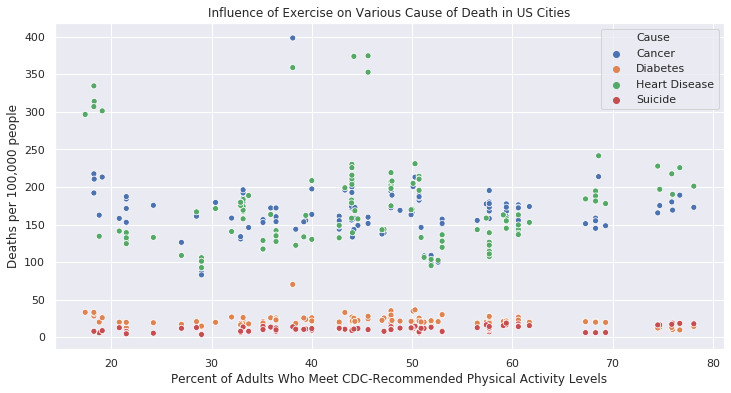

In [16]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(12,6))
ax = sns.scatterplot(x="Percent of Adults Who Meet CDC-Recommended Physical Activity Levels",
                     y="Deaths per 100,000 people",
                     hue="Cause",
                     data=df_exercise)
ax.set_title("Influence of Exercise on Various Cause of Death in US Cities")

Text(0.5, 1.0, 'Influence of Exercise on Cancer Deaths in US Cities')

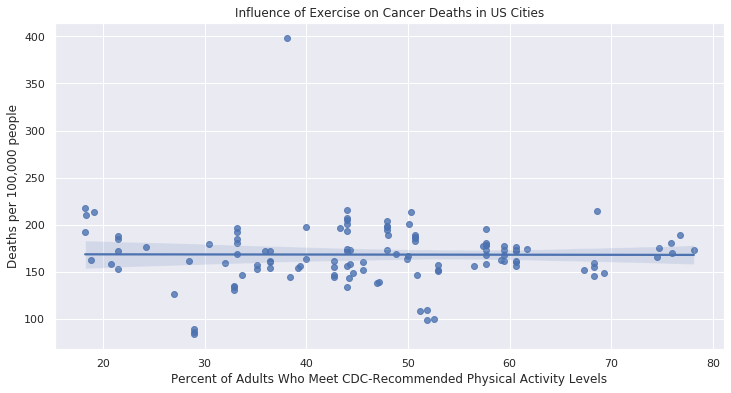

In [39]:
fig, ax = pyplot.subplots(figsize=(12,6))
ax = sns.regplot(x="Percent of Adults Who Meet CDC-Recommended Physical Activity Levels",
                 y="Deaths per 100,000 people",
                 data=df_exercise[(df_exercise['Cause'] == 'Cancer')])
ax.set_title("Influence of Exercise on Cancer Deaths in US Cities")

Text(0.5, 1.0, 'Influence of Exercise on Diabetes Deaths in US Cities')

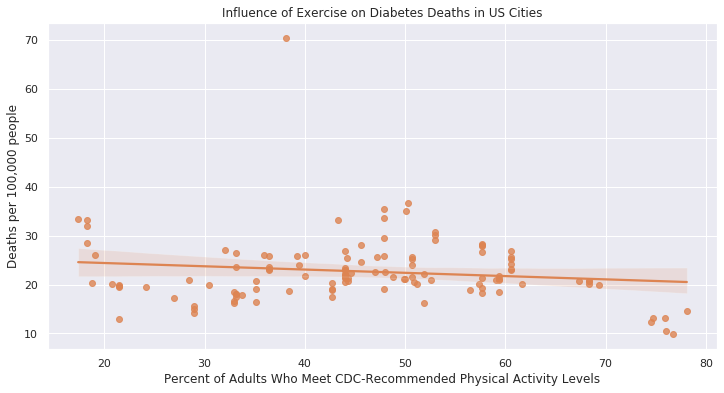

In [52]:
fig, ax = pyplot.subplots(figsize=(12,6))
ax = sns.regplot(x="Percent of Adults Who Meet CDC-Recommended Physical Activity Levels",
                 y="Deaths per 100,000 people",
                 data=df_exercise[(df_exercise['Cause'] == 'Diabetes')],
                 color='#DD8452')
ax.set_title("Influence of Exercise on Diabetes Deaths in US Cities")

Text(0.5, 1.0, 'Influence of Exercise on Heart Disease Deaths in US Cities')

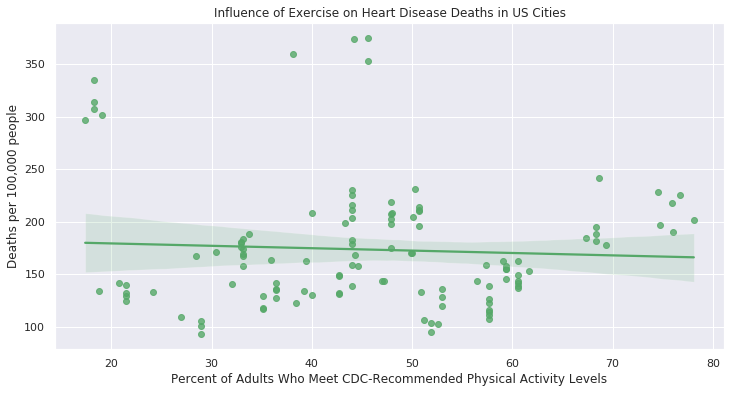

In [54]:
fig, ax = pyplot.subplots(figsize=(12,6))
ax = sns.regplot(x="Percent of Adults Who Meet CDC-Recommended Physical Activity Levels",
                 y="Deaths per 100,000 people",
                 data=df_exercise[(df_exercise['Cause'] == 'Heart Disease')],
                 color='#55A868')
ax.set_title("Influence of Exercise on Heart Disease Deaths in US Cities")

Text(0.5, 1.0, 'Influence of Exercise on Suicide Deaths in US Cities')

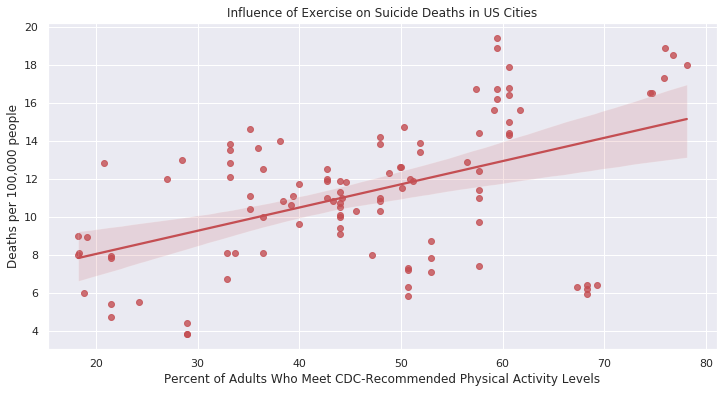

In [53]:
fig, ax = pyplot.subplots(figsize=(12,6))
ax = sns.regplot(x="Percent of Adults Who Meet CDC-Recommended Physical Activity Levels",
                 y="Deaths per 100,000 people",
                 data=df_exercise[(df_exercise['Cause'] == 'Suicide')],
                 color='#C44E52')
ax.set_title("Influence of Exercise on Suicide Deaths in US Cities")

Text(0.5, 1.0, 'Effects of Lack of Insurance on Various Cause of Death in US Cities')

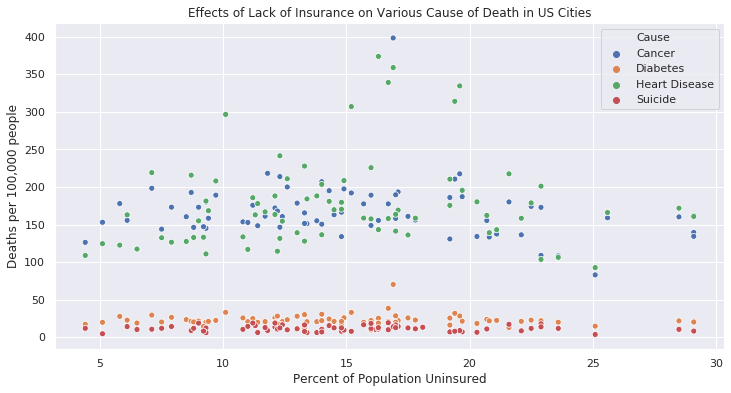

In [40]:
fig, ax = pyplot.subplots(figsize=(12,6))
ax = sns.scatterplot(x="Percent of Population Uninsured",
                     y="Deaths per 100,000 people",
                     hue="Cause",
                     data=df_uninsured)
ax.set_title("Effects of Lack of Insurance on Various Cause of Death in US Cities")

In [0]:
#Now to break this one in half too
df_i1 = df_uninsured[(df_uninsured['Cause'] == 'Cancer') | (df_uninsured['Cause'] == 'Heart Disease')]
df_i2 = df_uninsured[(df_uninsured['Cause'] == 'Diabetes') | (df_uninsured['Cause'] == 'Suicide')]

Text(0.5, 1.0, 'Influence of Lack of Insurance on Cancer Deaths in US Cities')

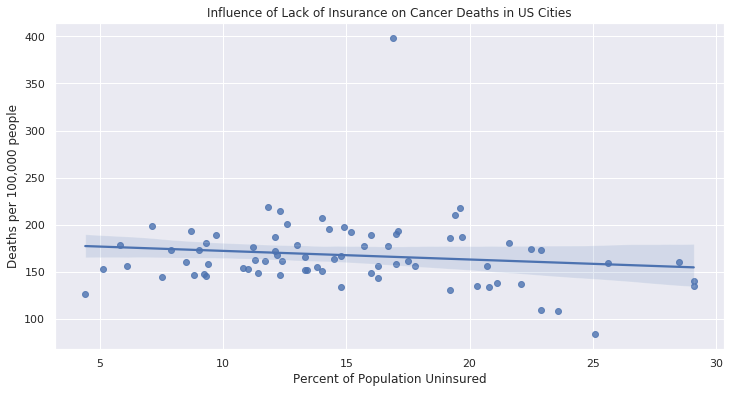

In [46]:
fig, ax = pyplot.subplots(figsize=(12,6))
ax = sns.regplot(x="Percent of Population Uninsured",
                 y="Deaths per 100,000 people",
                 data=df_uninsured[(df_uninsured['Cause'] == 'Cancer')])
ax.set_title("Influence of Lack of Insurance on Cancer Deaths in US Cities")

Text(0.5, 1.0, 'Influence of Lack of Insurance on Diabetes Deaths in US Cities')

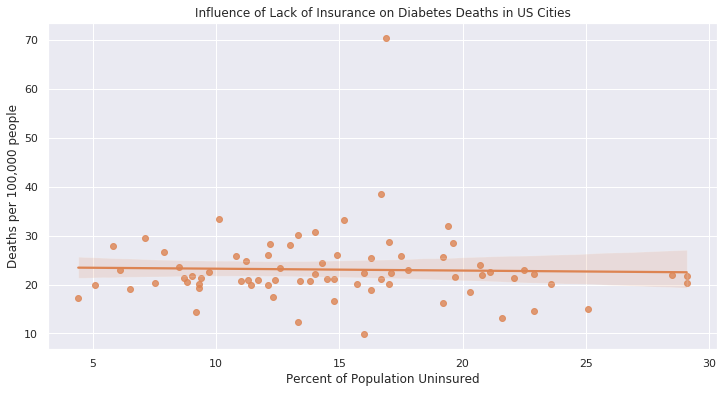

In [59]:
fig, ax = pyplot.subplots(figsize=(12,6))
ax = sns.regplot(x="Percent of Population Uninsured",
                 y="Deaths per 100,000 people",
                 data=df_uninsured[(df_uninsured['Cause'] == 'Diabetes')],
                 color='#DD8452')
ax.set_title("Influence of Lack of Insurance on Diabetes Deaths in US Cities")

Text(0.5, 1.0, 'Influence of Lack of Insurance on Heart Disease Deaths in US Cities')

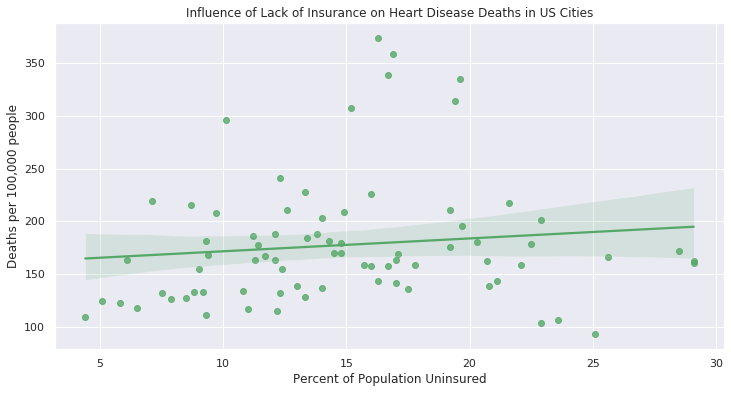

In [56]:
fig, ax = pyplot.subplots(figsize=(12,6))
ax = sns.regplot(x="Percent of Population Uninsured",
                 y="Deaths per 100,000 people",
                 data=df_uninsured[(df_uninsured['Cause'] == 'Heart Disease')],
                 color='#55A868')
ax.set_title("Influence of Lack of Insurance on Heart Disease Deaths in US Cities")

Text(0.5, 1.0, 'Influence of Lack of Insurance on Suicide Deaths in US Cities')

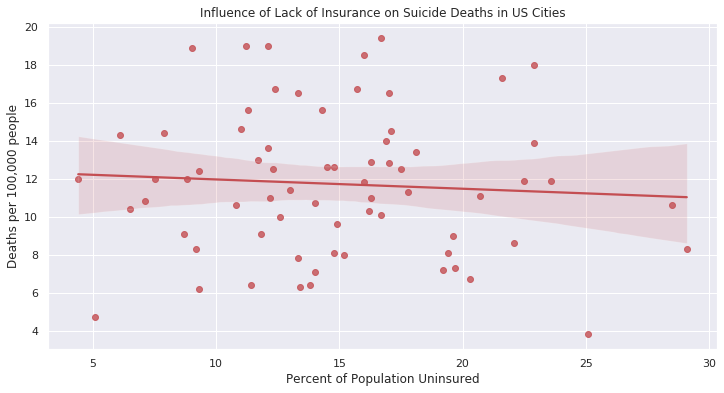

In [58]:
fig, ax = pyplot.subplots(figsize=(12,6))
ax = sns.regplot(x="Percent of Population Uninsured",
                 y="Deaths per 100,000 people",
                 data=df_uninsured[(df_uninsured['Cause'] == 'Suicide')],
                 color='#C44E52')
ax.set_title("Influence of Lack of Insurance on Suicide Deaths in US Cities")